# **Food Ingredient Image Classification with Transfer Learning (MobileNetV2)**

The notebook explores various models built  using transfer learning techniques.

Found 207 files belonging to 9 classes.
Found 229 files belonging to 9 classes.
Found 6840 files belonging to 9 classes.
0   Abulkasim
1   Baroqxon
2   Kokaldosh
3   Qaffol
4   Qaldrgoch
5   SHayhontohur
6   Shayhontohur_darvozasi
7   Suzuk ota
8   Yunusxon


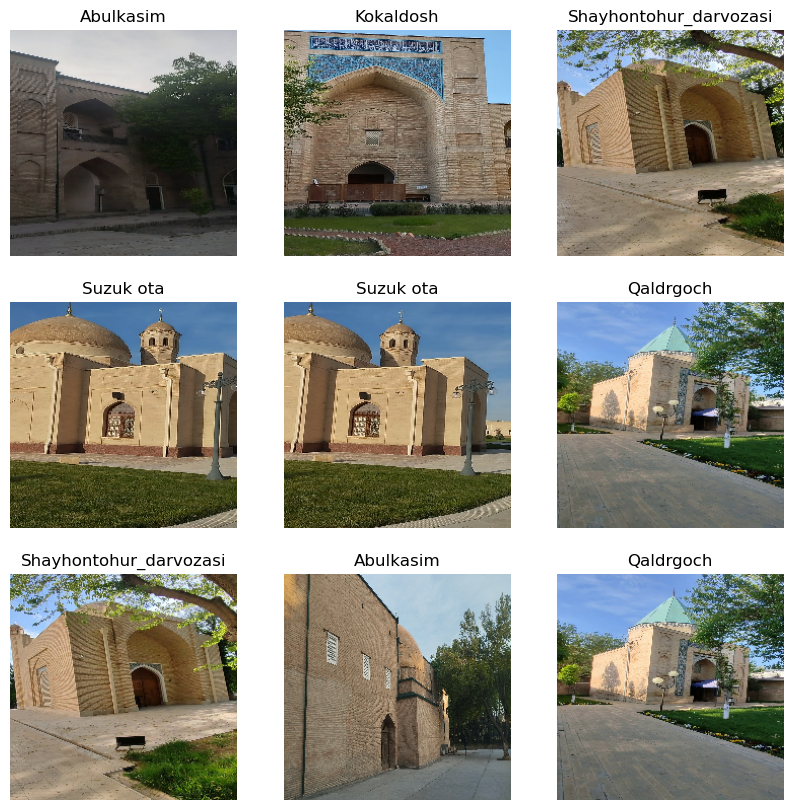

0 [[[-0.9336535  -0.83953583 -0.9179672 ]
  [-0.8958383  -0.8017207  -0.88015205]
  [-0.8491796  -0.755062   -0.83349335]
  ...
  [ 0.01176476  0.24705887  0.4666667 ]
  [ 0.00392163  0.23921573  0.45882356]
  [ 0.00392163  0.23921573  0.45882356]]

 [[-0.9673069  -0.88887554 -0.9594638 ]
  [-0.9064026  -0.8279712  -0.89855945]
  [-0.92156863 -0.84313726 -0.9137255 ]
  ...
  [ 0.0196079   0.254902    0.47450984]
  [ 0.01176476  0.24705887  0.4666667 ]
  [ 0.01176476  0.24705887  0.4666667 ]]

 [[-0.8891556  -0.84993994 -0.9048419 ]
  [-0.90432173 -0.86510605 -0.920008  ]
  [-0.9021208  -0.86290514 -0.9178071 ]
  ...
  [ 0.0196079   0.254902    0.47450984]
  [ 0.01176476  0.24705887  0.4666667 ]
  [ 0.01176476  0.24705887  0.4666667 ]]

 ...

 [[-0.93489504 -0.8407774  -0.91920877]
  [-0.9296123  -0.83549464 -0.913926  ]
  [-0.9362942  -0.84217656 -0.9206079 ]
  ...
  [-0.84426177 -0.7893598  -0.91485   ]
  [-0.8270908  -0.7553824  -0.88871574]
  [-0.9417716  -0.84989524 -0.9820681 ]]



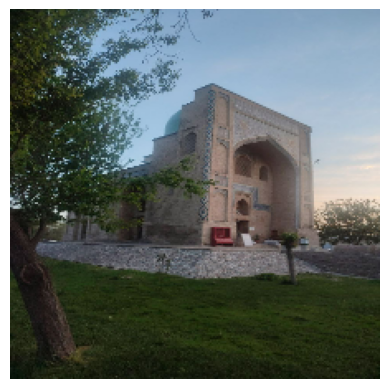

In [1]:
%run -i Data_preprocessing.ipynb

### **Importing necessary libraries**

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Activation
from keras.activations import relu, softmax
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.applications import MobileNetV2
from keras.layers import Dropout

### **Loading and Configuring MobileNetV2 Base Model**

In [3]:
# Load MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#base_model = tf.keras.applications.MobileNet(include_top=False, input_shape=(img_width, img_height, 3))

# Set the base model as non-trainable
base_model.trainable = False


### **Summary of MobileNetV2 Base Model**

In [4]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### **Building a Feature Extraction Model**

In [5]:
def build_model_feature_extraction(hp):
    """
    Build a Sequential model for feature extraction using MobileNetV2 as the base model.

    Args:
    - hp (HyperParameters): An instance of HyperParameters class for tuning hyperparameters.

    Returns:
    - model (Sequential): A compiled Keras Sequential model for feature extraction.
    """
    # Create a Sequential model
    model = Sequential()

    # Add the base model to the Sequential model
    model.add(base_model)

    # Add the GlobalAveragePooling2D layer
    model.add(GlobalAveragePooling2D())

    # Add the Flatten layer
    model.add(Flatten())

    # Add the Dense and Activation layers
    model.add(Dense(units=512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=128))
    model.add(Activation('relu'))

    model.add(Dense(units=len(data_cat)))
    model.add(Activation('softmax'))

    # Choose learning rate from a predefined list
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [7]:
 build_model_feature_extraction

<function __main__.build_model_feature_extraction(hp)>

### **Configuring Fine-Tuning for Specific Layers**

In [6]:
def build_model_fine_tuning():
    """
    Build a fine-tuning model by allowing training for specific layers of the base model.

    Returns:
    - None
    """
    base_model.trainable = True
    
    set_trainable = False
    
    for layer in base_model.layers:
        if layer.name == 'block_6_expand':
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
